# Plotting energies of 2d scan performed in MNDO.
# read in data. a is the scan in examine while b is a reference scan done previously.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ndih = 36
npyr = 17
aname = "p2"
bname = "ref"
eshift = 3978.   #set arbitrary energy zero point to make plot nicer.
ev2kcalmol = 23.

adih = np.genfromtxt("/home/winter/onsager/tsqm/%s/alldih.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
ae1 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE1.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
ae2 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE2.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
apyr0 = np.genfromtxt("/home/winter/onsager/tsqm/%s/pyramid.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
apyr = np.repeat(apyr0,ndih)
bdih = np.genfromtxt("/home/winter/onsager/tsqm/%s/alldih.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
be1 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE1.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
be2 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE2.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
bpyr0 = np.genfromtxt("/home/winter/onsager/tsqm/%s/pyramid.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
bpyr = np.repeat(bpyr0,ndih)

ae1[ ae1==0 ] = np.nan
ae2[ ae2==0 ] = np.nan
be1[ be1==0 ] = np.nan
be2[ be2==0 ] = np.nan
ae1 = ev2kcalmol*(eshift+ae1)
ae2 = ev2kcalmol*(eshift+ae2)
be1 = ev2kcalmol*(eshift+be1)
be2 = ev2kcalmol*(eshift+be2)

# x,y,z1,z2 contain the same data as the .dat loaded above, but rearranging to satisfy matplotlib input requirements
x = np.linspace(-180,0,num=ndih,endpoint=False)
y = np.linspace(-40,40,num=npyr,endpoint=True)
x,y = np.meshgrid(x,y)
az1 = np.reshape(ae1,(npyr,ndih))
az2 = np.reshape(ae2,(npyr,ndih))
bz1 = np.reshape(be1,(npyr,ndih))
bz2 = np.reshape(be2,(npyr,ndih))

z1m = np.fmin(az1, bz1)
z2m = np.fmin(az2, bz2)

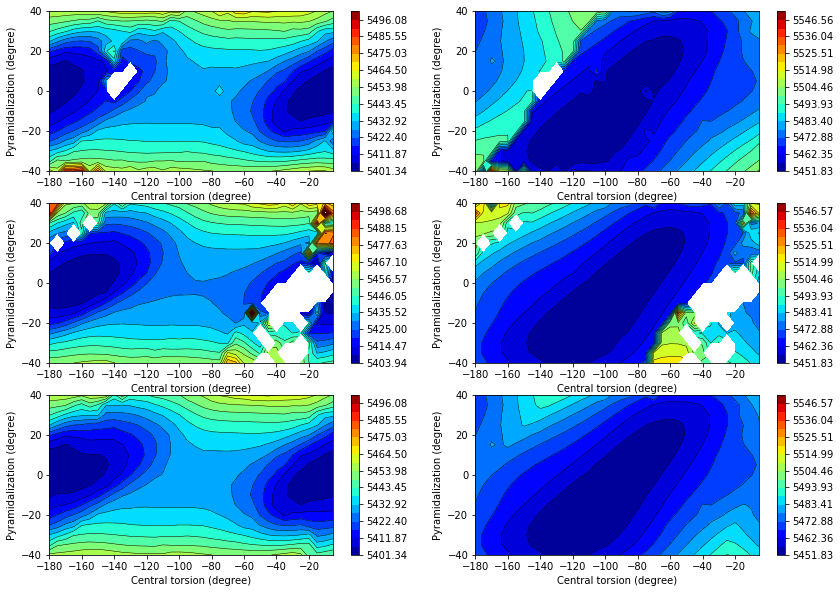

In [44]:
plt.figure(figsize=(14,10))

plt.subplot(321)
levels = np.linspace(np.nanmin(az1),np.nanmin(az1)+100,num=20,endpoint=True)
lines = plt.contour(x, y, az1, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, az1, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()

plt.subplot(322)
levels = np.linspace(np.nanmin(az2),np.nanmin(az2)+100,num=20,endpoint=True)
lines = plt.contour(x, y, az2, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, az2, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()

plt.subplot(323)
levels = np.linspace(np.nanmin(bz1),np.nanmin(bz1)+100,num=20,endpoint=True)
lines = plt.contour(x, y, bz1, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, bz1, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()

plt.subplot(324)
levels = np.linspace(np.nanmin(bz2),np.nanmin(bz2)+100,num=20,endpoint=True)
lines = plt.contour(x, y, bz2, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, bz2, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()

plt.subplot(325)
levels = np.linspace(np.nanmin(az1),np.nanmin(az1)+100,num=20,endpoint=True)
lines = plt.contour(x, y, z1m, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, z1m, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()

plt.subplot(326)
levels = np.linspace(np.nanmin(bz2),np.nanmin(bz2)+100,num=20,endpoint=True)
lines = plt.contour(x, y, z2m, levels, linewidths=0.5, colors='k')
blocks = plt.contourf(x, y, z2m, levels, cmap=plt.cm.jet)
plt.xlabel('Central torsion (degree)')
plt.ylabel('Pyramidalization (degree)')
plt.colorbar()
plt.show()


Though somewhat mosaic, a division from (-70, -40) to (-10, 40) is clearly shown

# Comparing to Pang's plot, which I'm trying to reproduce

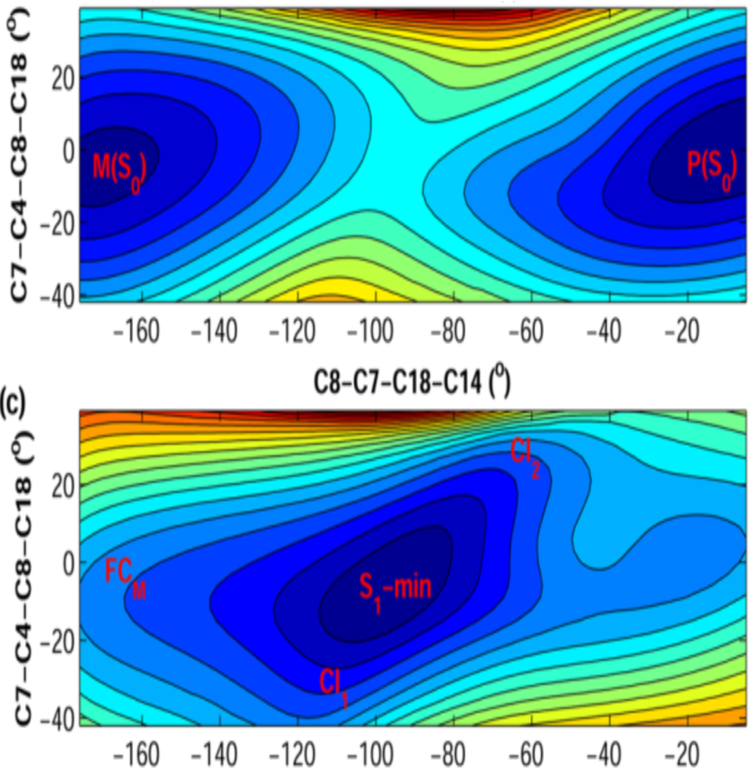

In [17]:
from IPython.display import Image
Image(filename='/home/winter/Desktop/PangPlot.png')